In [1]:
#Import Libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import seaborn as sns
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
  #load the data 
df = pd.read_csv("kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
df.shape

(400, 26)

In [5]:
#Create a list of columns to retain
retain = ["sg", "age","bp","al", "su","sc", "hemo","pcv", "wbcc", "rbcc", "htn", "classification"]

#retain = df.columns, Drop the columns that are not in retain
df = df.drop([col for col in df.columns if not col in retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


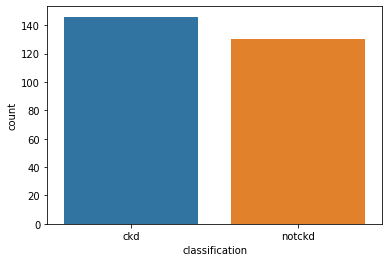

In [6]:
sns.countplot(df['classification'],label="Count")

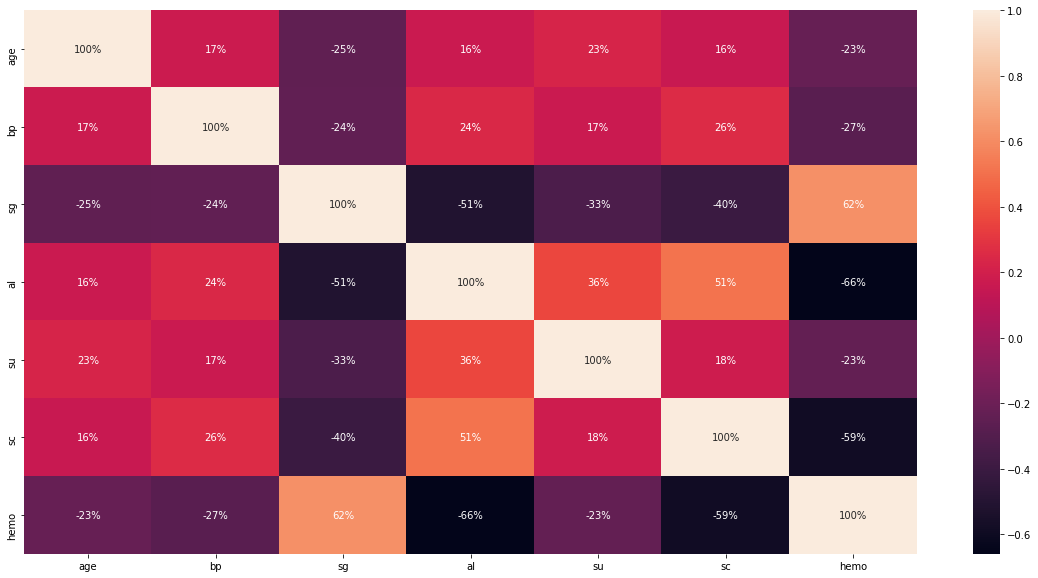

In [7]:
plt.figure(figsize=(20,10))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [8]:
print(retain)

['sg', 'age', 'bp', 'al', 'su', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']


In [9]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

In [10]:
df.head()

,age,bp,sg,al,su,sc,hemo,pcv,htn,classification
0,48.0,80.0,1.020,1.0,0.0,1.2,15.4,27,1,0
1,7.0,50.0,1.020,4.0,0.0,0.8,11.3,21,0,0
2,62.0,80.0,1.010,2.0,3.0,1.8,9.6,14,0,0
3,48.0,70.0,1.005,4.0,0.0,3.8,11.2,15,1,0
4,51.0,80.0,1.010,2.0,0.0,1.4,11.6,18,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 399
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             276 non-null    float64
 1   bp              276 non-null    float64
 2   sg              276 non-null    float64
 3   al              276 non-null    float64
 4   su              276 non-null    float64
 5   sc              276 non-null    float64
 6   hemo            276 non-null    float64
 7   pcv             276 non-null    int64  
 8   htn             276 non-null    int64  
 9   classification  276 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 33.7 KB


In [12]:
#Split the data
x= df[['sg', 'al', 'sc', 'pcv', 'htn']]
y = df['classification']

In [13]:
x

,sg,al,sc,pcv,htn
0,1.020,1.0,1.2,27,1
1,1.020,4.0,0.8,21,0
2,1.010,2.0,1.8,14,0
3,1.005,4.0,3.8,15,1
4,1.010,2.0,1.4,18,0
...,...,...,...,...,...
395,1.020,0.0,0.5,30,0
396,1.025,0.0,1.2,37,0
397,1.020,0.0,0.6,32,0
398,1.025,0.0,1.0,34,0


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 276, dtype: int64

In [15]:
#Split the data into 80% training and 20% testing 
x_train,  x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2,random_state=42)


In [16]:
x_train.shape

(220, 5)

In [17]:


x_scaler = StandardScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [18]:
x.shape[1]

5

In [19]:
#Build The model

model = Sequential()
model.add(Dense(128, input_dim=len(x.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               768       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 899
Trainable params: 899
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 200,
                         verbose = 1,
                         factor = 0.75,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=200)

In [23]:
history = model.fit(x=x_train, y=y_train, epochs=1000, callbacks=[lrd, mcp, es],batch_size=256, validation_split=0.1)

Epoch 1/1000
1/1 [==============================] - 0s 166ms/step - loss: 0.6925 - accuracy: 0.4798 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.6921 - accuracy: 0.4798 - val_loss: 0.6917 - val_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.6917 - accuracy: 0.4798 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6912 - accuracy: 0.4798 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6908 - accuracy: 0.4798 - val_loss: 0.6906 - val_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.6904 - accuracy: 0.4798 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.6899 - accuracy: 0.4798 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 8/1000

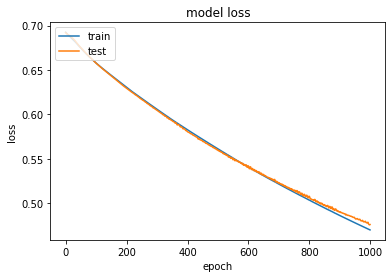

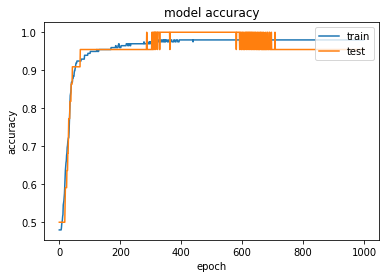

In [24]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

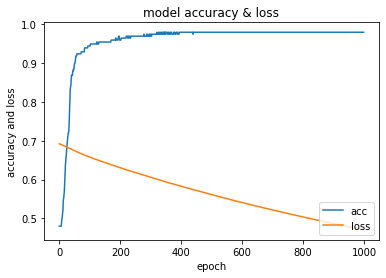

In [25]:
#Visualize the models accuracy and loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy & loss")
plt.ylabel("accuracy and loss")
plt.xlabel("epoch")
plt.legend(['acc', 'loss'], loc='lower right')
plt.show()

In [26]:
print("---------------------------------------------------------")
print("Shape of training data: ", x_train.shape)
print("Shape of test data    : ", x_test.shape )
print("---------------------------------------------------------")

---------------------------------------------------------
Shape of training data:  (220, 5)
Shape of test data    :  (56, 5)
---------------------------------------------------------


In [27]:
for model_file in glob.glob('model.h5'):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(x_test)
  pred = [1 if y>=0.5 else 0 for y in pred] #Threshold, transforming probabilities to either 0 or 1 depending if the probability is below or above 0.5
  scores = model.evaluate(x_test, y_test)
  print()
  print("Original  : {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted : {0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores    : loss = ", scores[0], " acc = ", scores[1])
  print("---------------------------------------------------------")
  print()

Model file:  model.h5
2/2 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.9821

Original  : 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0

Predicted : 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0

Scores    : loss =  0.47366005182266235  acc =  0.9821428656578064
---------------------------------------------------------

